Neural Network

In [2]:
#load in data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('wdbc.csv')

df.head()

,ID,Diagnosis,radius_1,texture_1,parameter_1,area_1,smoothness_1,compactness_1,concavity_1,concave points_1,...,radius_3,texture_3,parameter_3,area_3,smoothness_3,compactness_3,concavity_3,concave points_3,symmetry_3,fractal dimension_3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<Axes: >

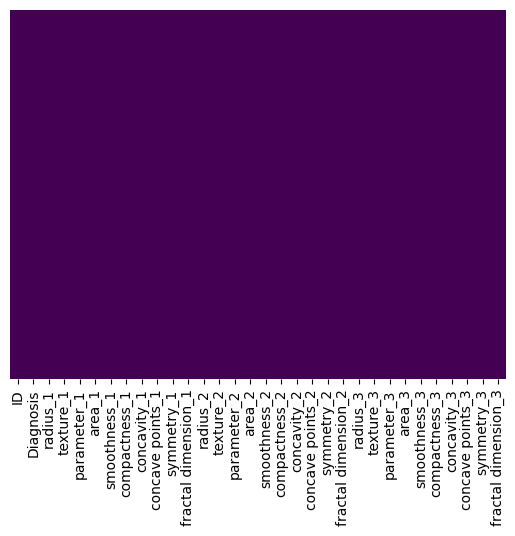

In [3]:
#check for missing data
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [4]:
#No missing data
#Need to convert Diagnosis column from "M" and "B" to "0" and "1"

df2=df.copy()
df2['Diagnosis']=df2['Diagnosis'].replace({'M':0,'B':1})
df2

C:\Users\laure\AppData\Local\Temp\ipykernel_24556\1616870434.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['Diagnosis']=df2['Diagnosis'].replace({'M':0,'B':1})


,ID,Diagnosis,radius_1,texture_1,parameter_1,area_1,smoothness_1,compactness_1,concavity_1,concave points_1,...,radius_3,texture_3,parameter_3,area_3,smoothness_3,compactness_3,concavity_3,concave points_3,symmetry_3,fractal dimension_3
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [39]:
#Standarize data

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(df2.drop('Diagnosis',axis=1), df2['Diagnosis'], test_size=0.20, 
                                                    random_state=101)


print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

print(y_train)
print(y_test)


455
455
114
114
476    1
130    1
246    1
205    0
16     0
      ..
552    1
393    0
75     0
337    0
523    1
Name: Diagnosis, Length: 455, dtype: int64
107    1
437    1
195    1
141    0
319    1
      ..
19     1
313    1
139    1
495    1
317    0
Name: Diagnosis, Length: 114, dtype: int64


In [42]:
#standardize
scaler= StandardScaler()

X_train2=scaler.fit_transform(X_train)
#y_train2=scaler.fit_transform([y_train])
X_test2=scaler.fit_transform(X_test)
#y_test2=scaler.fit_transform([y_test])




Artificial Neural Network Model

ANN Accuracy: 0.9737
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.97      0.99      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



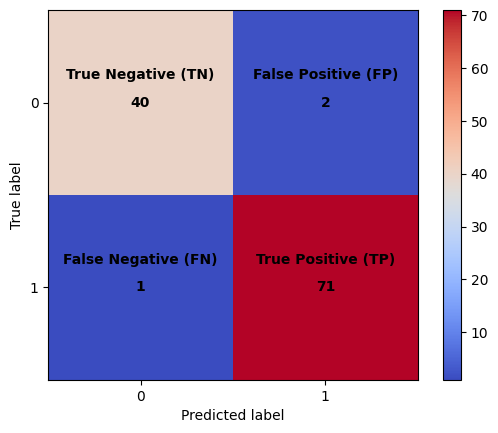

In [ ]:
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import classification_report, accuracy_score


#parameter grids
hidden_layer_sizes_list = [(10,),(50,),(100,),(50,50)]
learning_rate_init_list = [0.1, 0.01, 0.001]
max_iter_list = [100,200,300]

results = []

for hls in hidden_layer_sizes_list:
    for lr_init in learning_rate_init_list:
        for max_it in max_iter_list:
            #create and train model
            ann_model=MLPClassifier(hidden_layer_sizes=hls, learning_rate_init=lr_init, max_iter=max_it,random_state=0)
            ann_model.fit(X_train2, y_train)

            y_pred_ann = ann_model.predict(X_test2)
            accuracy_ann = accuracy_score(y_test, y_pred_ann)

            results.append({'hidden_layer_sizes': hls, 'learning_rate_init': lr_init, 'max_iter': max_it, 'accuracy':accuracy_ann})


df_results = pd.DataFrame(results)
print(df_results)

print(f"ANN Accuracy: {accuracy_ann:.4f}")
print(classification_report(y_test, y_pred_ann))


# Confusion Matrix
conf_matrix_ann = confusion_matrix(y_test, y_pred_ann)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_ann, display_labels=[0, 1])
disp.plot(cmap='coolwarm', text_kw={'color': 'black', 'fontsize': 10, 'fontweight': 'bold'})
# Add labels directly on top of the numbers
labels = [["True Negative (TN)", "False Positive (FP)"], ["False Negative (FN)", "True Positive (TP)"]]
for i in range(2):
    for j in range(2):
        plt.text(j, i - 0.15, labels[i][j], ha='center', va='center', color='black', fontsize=10, fontweight='bold')

